In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import pi
import matplotlib.patches as mpatches

In [ ]:
df=pd.read_csv(os.path.join(os.getcwd(),'..','..','Datasets/merged.csv'))
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Explicit Track.1,Unnamed: 29
0,4IaxDf2FixiQXq0mW7key9,Jessi,ZOOM,ZOOM,78,174840,False,0.874,0.600,6,...,5.0,53217.0,8.0,NaN,NaN,NaN,778299.0,0,0,NaN
1,1eadPrzB2P0ikQcqhKSAtv,Bad Wolves,Disobey,Zombie,66,254805,False,0.448,0.826,2,...,8.0,9221.0,33.0,300045453.0,184086.0,NaN,5361011.0,0,0,NaN
2,2ooF4088y5L72c4YTEJQoB,XXXTENTACION,Revenge,YuNg BrAtZ,76,101851,True,0.755,0.695,9,...,NaN,NaN,1.0,24600240.0,32645.0,128221222.0,1002168.0,1,1,NaN
3,536vha5aAUhlb50NGDfzfa,flora cash,You're Somebody Else (Acoustic),You're Somebody Else - Acoustic,59,219029,False,0.379,0.247,1,...,24.0,142965.0,22.0,71313267.0,29455.0,9351732.0,4844008.0,0,0,NaN
4,042Sl6Mn83JHyLEqdK7uI0,Billie Eilish,Happier Than Ever,Your Power,77,245896,False,0.632,0.284,9,...,28.0,568814.0,43.0,15646904.0,6432.0,NaN,1144737.0,0,0,NaN


In [108]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'track_artist_tuple', 'Unnamed: 0', 'Track', 'Album Name', 'Artist',
       'Release Date', 'ISRC', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track',
       'Explicit Track.1', 'Unnamed: 29'],
      dtype='object')

In [109]:
df_copy=df.copy()
df_copy['Release Date'] = pd.to_datetime(df_copy['Release Date'], format='%d-%m-%Y')
df_copy['Release Year'] = df_copy['Release Date'].dt.year
print('the null release years if any')
print(df_copy['Release Year'].isna().sum())

print('the value counts')
df_copy['Release Year'].value_counts()

the null release years if any
0
the value counts


Release Year
2022    75
2021    70
2018    51
2020    51
2017    48
2019    44
2016    22
2013    21
2015    20
2012    15
2014    13
2011     7
2010     5
2002     2
2000     2
1991     2
2009     2
2008     2
2006     1
2005     1
Name: count, dtype: int64

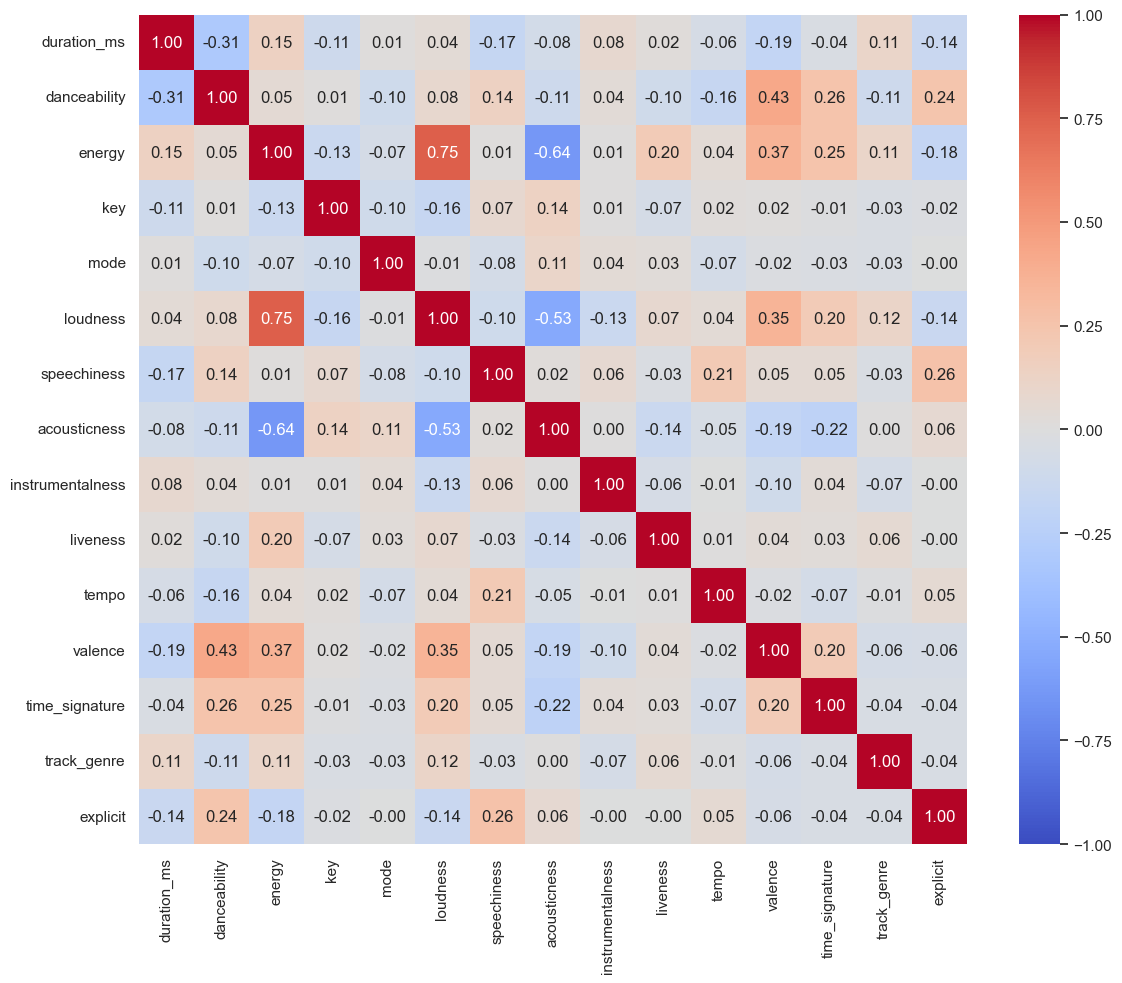

In [ ]:
from sklearn.preprocessing import LabelEncoder

# drawing the correlation matrix.
columns_of_corr=['duration_ms', 'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence', 'time_signature', 'track_genre', 'explicit']

#Applying label encoder to track genre.
df_copy=df[columns_of_corr].copy()
le=LabelEncoder()
df_copy['track_genre']=le.fit_transform(df_copy['track_genre'])


plt.figure(figsize=(12,10))
corr_matrix=df_copy.corr(numeric_only=True)
dataplot=sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.tight_layout()
plt.savefig('../images/correlation_matrix.png', dpi=300)
plt.show()

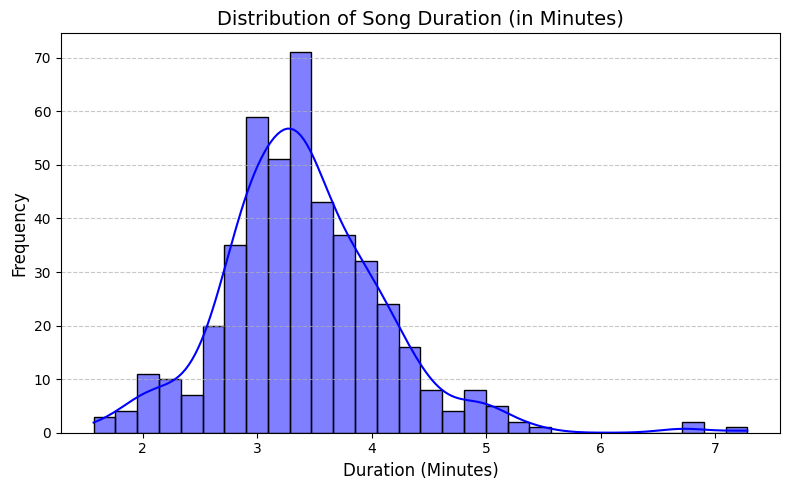

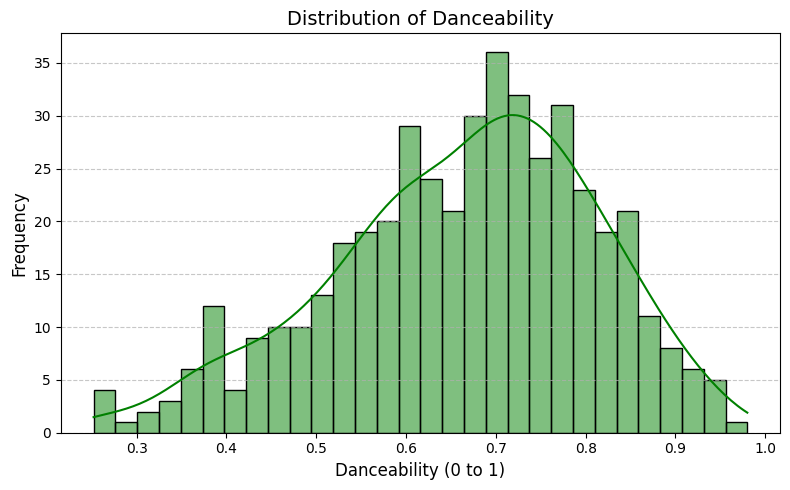

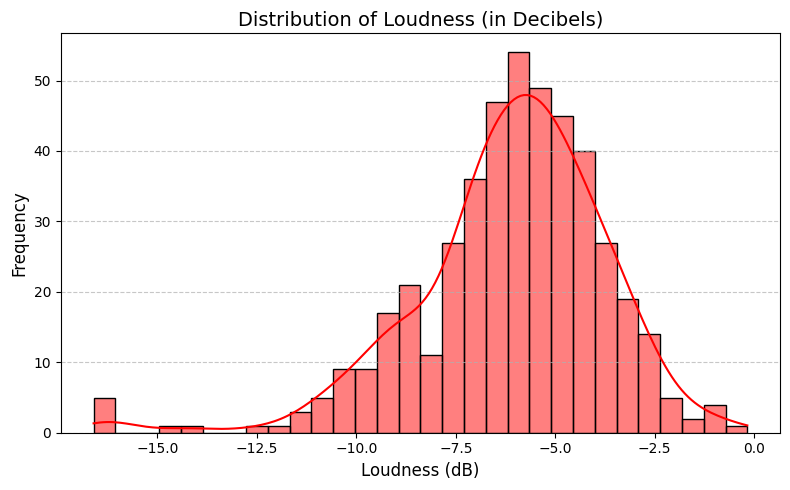

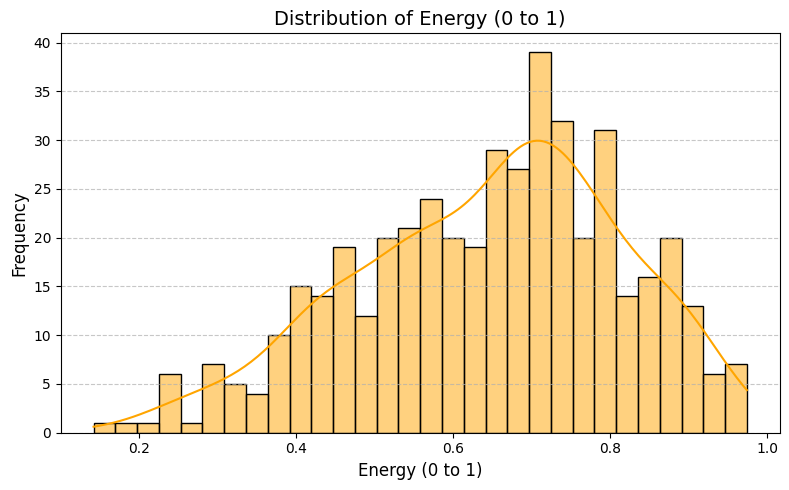

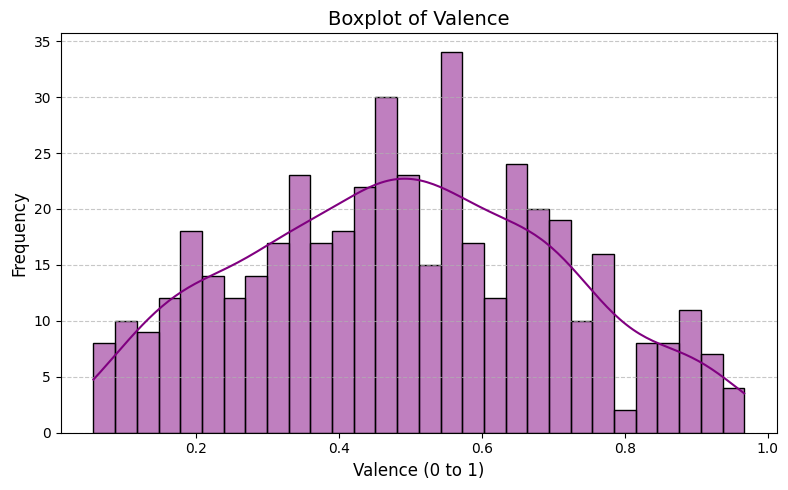

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'dataset.csv' with the path to your merged dataset
data = pd.read_csv('../../datasets/merged.csv')

# Convert duration from milliseconds to minutes for easier interpretation
data['duration_minutes'] = data['duration_ms'] / (1000 * 60)

# 1. Distribution of duration (in minutes)
plt.figure(figsize=(8, 5))
sns.histplot(data['duration_minutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Song Duration (in Minutes)', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/loop_2/duration_distribution.png')  # Save the figure
plt.show()

# 2. Distribution of danceability
plt.figure(figsize=(8, 5))
sns.histplot(data['danceability'], bins=30, kde=True, color='green')
plt.title('Distribution of Danceability', fontsize=14)
plt.xlabel('Danceability (0 to 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/loop_2/danceability_distribution.png')  # Save the figure
plt.show()

# 3. Distribution of loudness
plt.figure(figsize=(8, 5))
sns.histplot(data['loudness'], bins=30, kde=True, color='red')
plt.title('Distribution of Loudness (in Decibels)', fontsize=14)
plt.xlabel('Loudness (dB)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/loop_2/loudness_distribution.png')  # Save the figure
plt.show()

# 4. Distribution of energy
plt.figure(figsize=(8, 5))
sns.histplot(data['energy'], bins=30, kde=True, color='orange')
plt.title('Distribution of Energy (0 to 1)', fontsize=14)
plt.xlabel('Energy (0 to 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/loop_2/energy_distribution.png')  # Save the figure
plt.show()

# 5. Boxplot for identifying outliers in valence
plt.figure(figsize=(8, 5))
sns.histplot(x=data['valence'], bins=30, kde=True, color='purple')
plt.title('Boxplot of Valence', fontsize=14)
plt.xlabel('Valence (0 to 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../images/loop_2/valence_distribution.png')  # Save the figure
plt.show()


In [ ]:
df_copy=pd.read_csv('../../datasets/merged.csv')
df_copy['Total Streams'] = df_copy['Spotify Streams'] + df_copy['YouTube Views'] + df_copy['TikTok Views']
top_songs = df_copy.nlargest(20, 'Total Streams')
print(top_songs)

                   track_id             artists  \
428  4LRPiXqCikLlN15c3yImP7        Harry Styles   
429  4Dvkj6JhhA12EX05fT7y2e        Harry Styles   
40   1yvMUkIOTeUNtNWlWRgANS                 Sia   
447  1PckUlxKqWQs3RlWXVBLw3               Lizzo   
249  0b11D9D0hMOYCIMN3OKreM  Witt Lowry,Ava Max   
109  7qiZfU4dY1lWllzX7mPBI3          Ed Sheeran   
411  0pqnGHJpmpxLKifKRmU6WP     Imagine Dragons   
153  5TWa50OQHAk0BR3BYPq9df        Paloma Faith   
324  0Aqi7ArnBrGblW5T6p2jmD       Trevor Daniel   
391  7BoobGhD4x5K96Me0hqC8Q        Bella Poarch   
302  4ZtFanR9U6ndgddUvNcjcG      Olivia Rodrigo   
386  1mWdTewIgB3gtBM3TOSFhB                 BTS   
387  1hciAV5LrrTkRV0g0StZ6h                 BTS   
388  3bjg5cbmuwDoS7e2dAWyRG                 BTS   
307  6xGruZOHLs39ZbVccQTuPZ                Joji   
236  748mdHapucXQri7IAO8yFK        Doja Cat,SZA   
237  3DarAbFujv6eYNliUTyqtz        Doja Cat,SZA   
0    4IaxDf2FixiQXq0mW7key9               Jessi   
192  67BtfxlNbhBmCDR2L2l8qd    

printing the platform means
{'TikTok': energy                   0.627150
loudness                -5.834150
speechiness              0.078670
tempo                  132.305350
instrumentalness         0.001844
duration_ms         188555.750000
dtype: float64, 'Spotify': energy                   0.621850
loudness                -6.656650
speechiness              0.108830
tempo                  124.832900
instrumentalness         0.006652
duration_ms         212792.750000
dtype: float64, 'YouTube': energy                   0.681700
loudness                -5.440350
speechiness              0.101190
tempo                  124.207200
instrumentalness         0.006799
duration_ms         208741.700000
dtype: float64}
min vals:
energy                   0.621850
loudness                -6.656650
speechiness              0.078670
tempo                  124.207200
instrumentalness         0.001844
duration_ms         188555.750000
dtype: float64
max vals
energy                   0.681700
loudnes

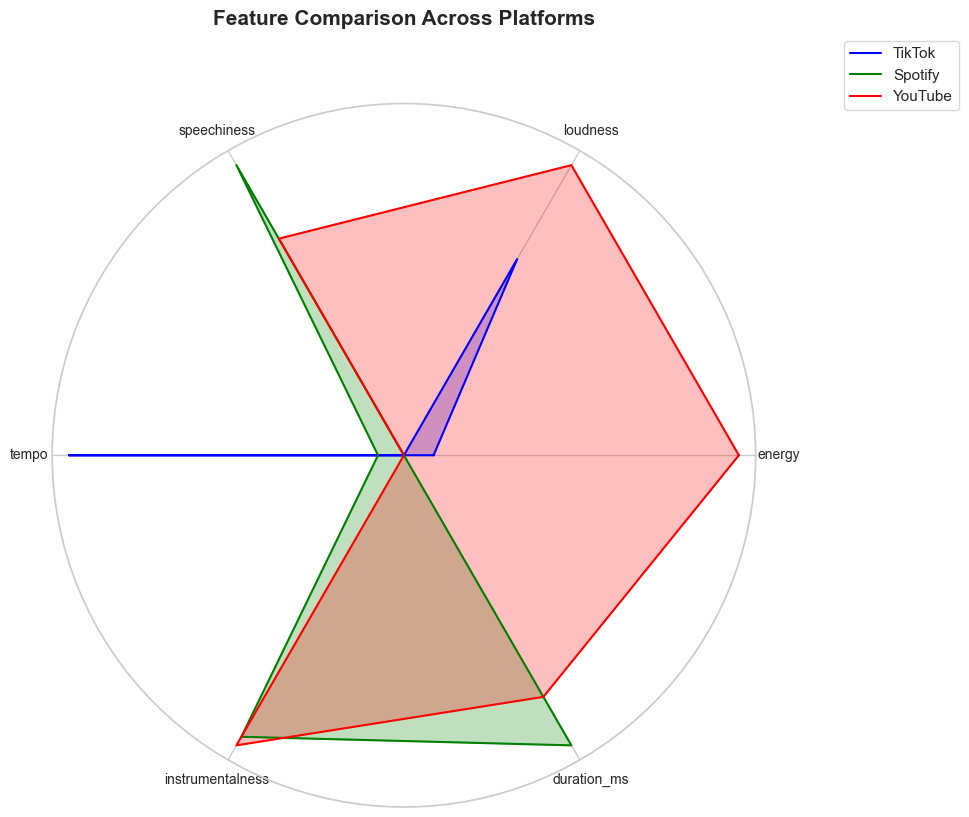

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_copy=pd.read_csv('../../datasets/merged.csv')

#Getting the top 20 performing songs platform wise based on platform-specific views.
tiktok_top_songs = df_copy.nlargest(20, 'TikTok Views')
spotify_top_songs = df_copy.nlargest(20, 'Spotify Streams')
youtube_top_songs = df_copy.nlargest(20, 'YouTube Views')

tmp_tiktok_top_songs=tiktok_top_songs

features_considered = ['energy', 'loudness', 'speechiness', 'tempo', 'instrumentalness', 'duration_ms']

# Dropping unnecessary columns
tiktok_top_songs = tiktok_top_songs[features_considered]
spotify_top_songs = spotify_top_songs[features_considered]
youtube_top_songs = youtube_top_songs[features_considered]

# Aggregating mean values for each platform
platform_means = {
    'TikTok': tiktok_top_songs.mean(),
    'Spotify': spotify_top_songs.mean(),
    'YouTube': youtube_top_songs.mean()
}

print('printing the platform means')
print(platform_means)

# Normalize the data for radar chart
min_vals = pd.concat(platform_means.values(), axis=1).min(axis=1)
max_vals = pd.concat(platform_means.values(), axis=1).max(axis=1)
print('min vals:')
print(min_vals)

print('max vals')
print(max_vals)
platform_means_normalized = {
    platform: (values - min_vals) / (max_vals - min_vals)              #By subtracting 0, we get the scaled down values of means. By subtracting with 'min_vals', we get the normalized values of the 3 platforms.
    for platform, values in platform_means.items()
}

print('printing the normalized means')
print(platform_means_normalized)

# Radar chart setup
labels = features_considered
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot data for each platform
colors = ['blue', 'green', 'red']
for idx, (platform, values) in enumerate(platform_means_normalized.items()):
    values = values.tolist() + [values.iloc[0]]  # Close the circle
    ax.plot(angles, values, label=platform, color=colors[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

# Add feature labels
ax.set_yticks([])  # Remove radial lines
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Add title and legend
plt.title('Feature Comparison Across Platforms', size=15, weight='bold', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Save and show plot
plt.tight_layout()
plt.savefig('../images/loop_2/radar_chart_features_fixed_with_normalization.png', dpi=300)
plt.show()


For knowing the min and max values for the 6 factors.

In [ ]:
print(pd.read_csv('../../datasets/merged.csv')[features_considered[0:-1]+['duration_ms']].describe())

           energy    loudness  speechiness       tempo  instrumentalness  \
count  454.000000  454.000000   454.000000  454.000000        454.000000   
mean     0.644053   -6.125227     0.093177  123.575934          0.013380   
std      0.169063    2.404281     0.084611   28.795093          0.067120   
min      0.142000  -16.603000     0.024600   48.718000          0.000000   
25%      0.530000   -7.277000     0.039675  102.977250          0.000000   
50%      0.664000   -5.867500     0.059800  121.473000          0.000001   
75%      0.770000   -4.580750     0.105000  140.083250          0.000175   
max      0.974000   -0.173000     0.463000  205.561000          0.703000   

         duration_ms  
count     454.000000  
mean   204347.339207  
std     43019.652257  
min     94245.000000  
25%    178079.250000  
50%    199795.000000  
75%    227731.250000  
max    436721.000000  
